# Advent of Code 2024
## Day 06


### Part 1

In [13]:
import numpy as np

filename = 'input.txt'
# filename = 'test_input.txt'

with open( filename ) as file:
    lines = file.readlines()
    
lines = [ line.strip() for line in lines ]

directions = { 2: (0, 1), 3: (1, 0), 4: (0, -1), 5: (-1, 0) }
number_of_lines = len( lines )
elems_per_line = len( lines[1] )
map_array = np.zeros( (number_of_lines, elems_per_line), dtype=int )

for ii, line in enumerate( lines ):
    for jj, _ in enumerate( line ):

        if lines[ii][jj] == ".":
            map_array[ii, jj] = 0
        elif lines[ii][jj] == "#":
            map_array[ii, jj] = -1
        elif lines[ii][jj] == "^":
            map_array[ii, jj] = 2
        elif lines[ii][jj] == ">":
            map_array[ii, jj] = 3
        elif lines[ii][jj] == "v":
            map_array[ii, jj] = 4
        elif lines[ii][jj] == "<":
            map_array[ii, jj] = 5

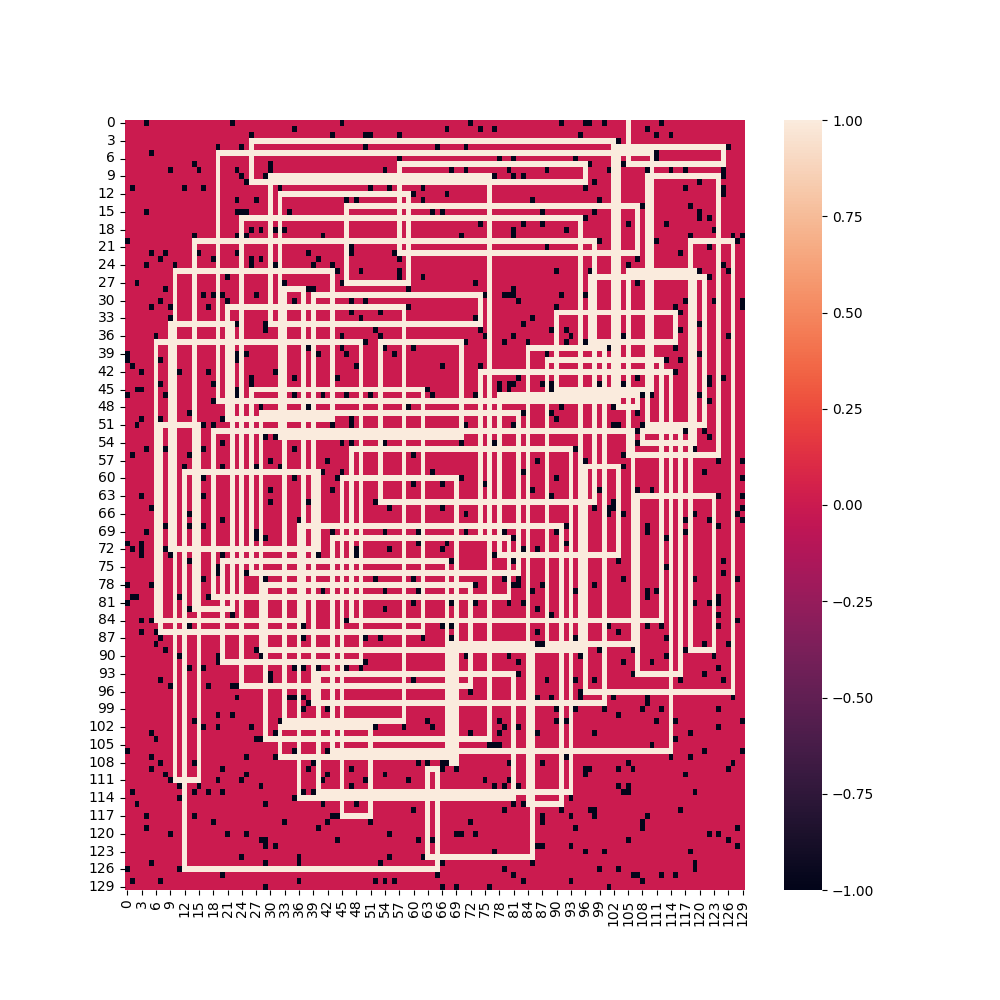

5461

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep

obstacles = np.where( map_array == -1 )
obstacles_y = obstacles[0]
obstacles_x = obstacles[1]
obstacles = np.array( [obstacles_y, obstacles_x] )

while True:
    guard_pos = np.where( map_array > 1 )
    
    # Break no guar on map
    if len( guard_pos[0] ) == 0:
        break
    
    guard_pos = np.array( [guard_pos[0][0], guard_pos[1][0]] )
    # print( guard_pos )
    
    # Guard faces up
    if map_array[ guard_pos[0], guard_pos[1] ] == 2:

        col_obstacles = obstacles_y[ obstacles_x == guard_pos[1] ]
        col_obstacles = col_obstacles[ col_obstacles < guard_pos[0] ]
        if col_obstacles.size == 0:     # No obstacles on the way
            map_array[ 0:guard_pos[0]+1, guard_pos[1] ] = 1
            break
        
        first_obstacle_y = col_obstacles[-1]
        map_array[ first_obstacle_y+1:guard_pos[0]+1:, guard_pos[1] ] = 1
        map_array[ first_obstacle_y+1, guard_pos[1] ] = 3
        
    # Guard faces right
    elif map_array[ guard_pos[0], guard_pos[1] ] == 3:

        row_obstacles = obstacles_x[ obstacles_y == guard_pos[0] ]
        row_obstacles = row_obstacles[ row_obstacles > guard_pos[1] ]
        if row_obstacles.size == 0:
            map_array[ guard_pos[0], guard_pos[1]: ] = 1
            break
        
        first_obstacle_x = row_obstacles[0]
        map_array[ guard_pos[0], guard_pos[1]:first_obstacle_x ] = 1
        map_array[ guard_pos[0], first_obstacle_x-1 ] = 4
        
    # Guard faces down
    elif map_array[ guard_pos[0], guard_pos[1] ] == 4:

        col_obstacles = obstacles_y[ obstacles_x == guard_pos[1] ]
        col_obstacles = col_obstacles[ col_obstacles > guard_pos[0] ]
        if col_obstacles.size == 0:
            map_array[ guard_pos[0]:, guard_pos[1] ] = 1
            break
        
        first_obstacle_y = col_obstacles[0]
        map_array[ guard_pos[0]:first_obstacle_y, guard_pos[1] ] = 1
        map_array[ first_obstacle_y-1, guard_pos[1] ] = 5
    
    # Guard faces left
    elif map_array[ guard_pos[0], guard_pos[1] ] == 5:

        row_obstacles = obstacles_x[ obstacles_y == guard_pos[0] ]
        row_obstacles = row_obstacles[ row_obstacles < guard_pos[1] ]
        if row_obstacles.size == 0:
            map_array[ guard_pos[0], :guard_pos[1]+1 ] = 1
            break
        
        first_obstacle_x = row_obstacles[-1]
        map_array[ guard_pos[0], first_obstacle_x+1:guard_pos[1]+1 ] = 1
        map_array[ guard_pos[0], first_obstacle_x+1 ] = 2


plt.figure(figsize=(10, 10))
sns.heatmap(map_array)
plt.show()

ans = len( np.where( map_array == 1 )[0] )
ans     # 5460 too low; 5461 correct

### Part 2

In [ ]:
# First finding all horizontal paths
hor_paths = []

for ii in range( number_of_lines ):
    row = map_array[ii, :]
    path = row == 1
    
    if path.size == 0:
        continue
    else:
        endpoints = row[ path[0], path[-1] ]
        hor_paths.append( (ii, path[0], path[-1]) )